# Wordle

From Wikipedia: __Wordle__ is a web-based word game created and developed by Welsh software engineer Josh Wardle. Players have six attempts to guess a five-letter word, with feedback given for each guess in the form of colored tiles indicating when letters match or occupy the correct position. <br>

#### 1. Create a function called `wordle_single` that will determine how many Greens, Yellows, and Reds a guess received.
There will be two inputs for this function:
1. __`answer`__ which is a *string* denoting the correct answer for the game
2. __`guess`__ which is a *string* denoting the guess of the user

Return the answer in a *dictionary* called __`single_result`__ containing the following key-value pair: <br>
a. __`Green`__ : integer number of green letters in the guess <br>
b. __`Yellow`__ : integer number of yellow letters in the guess <br>
c. __`Red`__ : integer number of red letters in the guess <br>


> *Assume that the user will input a `guess` with the same number of letters as the `answer`*


Examples:

1. wordle_single("ABCDE","ABCDE") --> {'Green': 5, 'Yellow': 0, 'Red': 0}
2. wordle_single("ABCDE","ABACA") --> {'Green': 2, 'Yellow': 1, 'Red': 2}
3. wordle_single("ITMGT","ASTIG") --> {'Green': 0, 'Yellow': 3, 'Red': 2}
4. wordle_single("AAAAA","BBBBB") --> {'Green': 0, 'Yellow': 0, 'Red': 5}

In [1]:
def wordle_single(answer, guess):
    answerlist = []
    yellowlist = set()
    colors = ["Green", "Yellow", "Red"]
    numbers = []
    green = 0
    yellow = 0
    red = 0
    for letter in answer:
        answerlist.append(letter)
    for i in range(5):
        if guess[i] == answer[i]:
            green += 1
            if guess[i] in yellowlist:
                yellow -= 1
                red+= 1
            else:
                yellowlist.add(guess[i])
        elif guess[i] in answerlist and guess[i] not in yellowlist:
            yellowlist.add(guess[i])
            yellow += 1
        else:
            red+= 1
    numbers.append(green)
    numbers.append(yellow)
    numbers.append(red)
    single_result = {k:v for k, v in zip(colors, numbers)}
    return single_result

#### 2. Create a function called `wordle_group` that will determine how many Greens, Yellows, and Reds a *LIST* of guesses received.
There will be two inputs for this function:
1. __`answer`__ which is a *string* denoting the correct answer for the game
2. __`guesses`__ which is a *list* denoting the five supposed guesses of the user

Return the answer in a *dictionary* called __`results`__ containing the following key-value pairs:
1. __`Correct`__ : True or False (boolean) if the user correctly guessed the answer <br>
2. __`guess_x`__ : (dictionary) -- (where x is the guess number in the list of guesses).<br>

The nested dictionary __`guess_x`__ should contain the following key-value pair: <br> 
a. __`Green`__ : integer number of green letters in the guess <br>
b. __`Yellow`__ : integer number of yellow letters in the guess <br>
c. __`Red`__ : integer number of red letters in the guess <br>


> *If the player correctly guesses the word even before the five guesses are used, the game should stop already.*


Examples:
1. wordle_group("ABCDE",["AAAAA", "ASDFG", "CCCCC", "ABACA", "ARCAN"])<br><br>
__Output:__ <br>{'Correct': False, <br>
 'guess_1': {'Green': 1, 'Yellow': 0, 'Red': 4},<br>
 'guess_2': {'Green': 1, 'Yellow': 1, 'Red': 3},<br>
 'guess_3': {'Green': 1, 'Yellow': 0, 'Red': 4},<br>
 'guess_4': {'Green': 2, 'Yellow': 1, 'Red': 2},<br>
 'guess_5': {'Green': 2, 'Yellow': 0, 'Red': 3}}<br>
<br>
2. wordle_group("ABCDE",["EDCBA", "ABCDE", "CCCCC", "DDDDD", "EEEEE"])<br><br>
__Output:__ <br>{'Correct': True,<br>
 'guess_1': {'Green': 1, 'Yellow': 4, 'Red': 0},<br>
 'guess_2': {'Green': 5, 'Yellow': 0, 'Red': 0}}<br>

In [2]:
def wordle_group(answer,guesses):
    Correct = None
    results = {}
    
    for i in range(0, len(guesses)):
        if answer == guesses[i]:
            Correct = True
        elif answer != guesses[i]:
            Correct = False

    results["Correct"] = Correct
    
    
    for j in range(0, len(guesses)):
        results[f"guess_{j+1}"] = wordle_single(answer, guesses[j])
        
    return results

#### 3a. Load the `wordle_data_final.json` JSON file into a DataFrame. Use the `pandas` library to do so. <br>
#### This JSON file contains 50000 games that 5 friends played. <br>
> 1. The __`name`__ column is the name of the player for that game <br> <br>
> 2. The __`game`__ column contains details of the game. The first element (index = 0) in the list is the `answer`, while the remaining elements of the list are the `guesses` of the player.

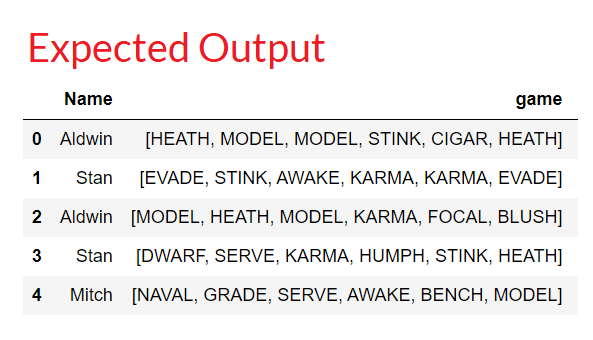

In [4]:
# code here

import pandas as pd

wordle_df = pd.read_json("wordle_data_final.json")
wordle_df

,Name,game
0,Aldwin,"[HEATH, MODEL, MODEL, STINK, CIGAR, HEATH]"
1,Stan,"[EVADE, STINK, AWAKE, KARMA, KARMA, EVADE]"
2,Aldwin,"[MODEL, HEATH, MODEL, KARMA, FOCAL, BLUSH]"
3,Stan,"[DWARF, SERVE, KARMA, HUMPH, STINK, HEATH]"
4,Mitch,"[NAVAL, GRADE, SERVE, AWAKE, BENCH, MODEL]"
...,...,...
49995,Aldwin,"[SERVE, NAVAL, BLUSH, HEATH, QUIET, SERVE]"
49996,Mitch,"[GRADE, BENCH, CIGAR, NAVAL, HEATH, REBUT]"
49997,Aldwin,"[NAVAL, AWAKE, KARMA, BENCH, DWARF, REBUT]"
49998,Hazel,"[NAVAL, SERVE, BENCH, BENCH, HUMPH, SERVE]"


#### 3b. Afterwards, create two new columns:
> 1. Column __`expected`__ which contains the just the answer <br><br>
> 2. Column __`guesses`__ which is a list that contains the guesses of the player for the game

*__Hint:__ You can use the .apply() function paired with a lambda function for this* <br>
*__Warning:__ Use vectorized operations as much as possible. Avoid using for loops (use only sparingly).*

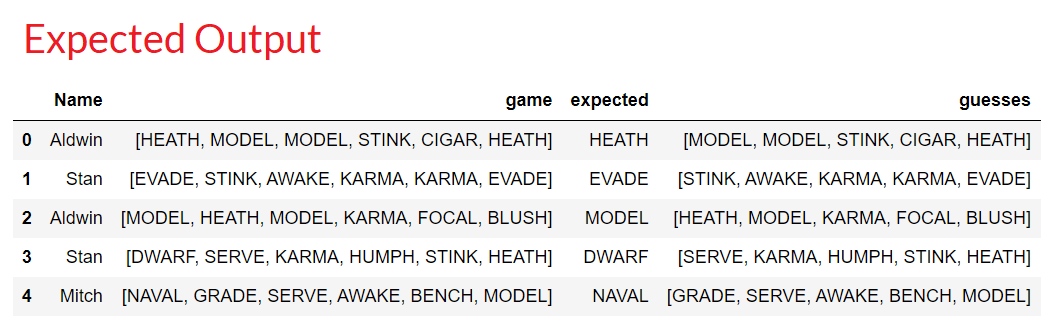

In [5]:
# code here

wordle_df["expected"] = wordle_df["game"].apply(lambda x: x[0])

wordle_df["guesses"] = wordle_df["game"].apply(lambda x: x[1:])

wordle_df

,Name,game,expected,guesses
0,Aldwin,"[HEATH, MODEL, MODEL, STINK, CIGAR, HEATH]",HEATH,"[MODEL, MODEL, STINK, CIGAR, HEATH]"
1,Stan,"[EVADE, STINK, AWAKE, KARMA, KARMA, EVADE]",EVADE,"[STINK, AWAKE, KARMA, KARMA, EVADE]"
2,Aldwin,"[MODEL, HEATH, MODEL, KARMA, FOCAL, BLUSH]",MODEL,"[HEATH, MODEL, KARMA, FOCAL, BLUSH]"
3,Stan,"[DWARF, SERVE, KARMA, HUMPH, STINK, HEATH]",DWARF,"[SERVE, KARMA, HUMPH, STINK, HEATH]"
4,Mitch,"[NAVAL, GRADE, SERVE, AWAKE, BENCH, MODEL]",NAVAL,"[GRADE, SERVE, AWAKE, BENCH, MODEL]"
...,...,...,...,...
49995,Aldwin,"[SERVE, NAVAL, BLUSH, HEATH, QUIET, SERVE]",SERVE,"[NAVAL, BLUSH, HEATH, QUIET, SERVE]"
49996,Mitch,"[GRADE, BENCH, CIGAR, NAVAL, HEATH, REBUT]",GRADE,"[BENCH, CIGAR, NAVAL, HEATH, REBUT]"
49997,Aldwin,"[NAVAL, AWAKE, KARMA, BENCH, DWARF, REBUT]",NAVAL,"[AWAKE, KARMA, BENCH, DWARF, REBUT]"
49998,Hazel,"[NAVAL, SERVE, BENCH, BENCH, HUMPH, SERVE]",NAVAL,"[SERVE, BENCH, BENCH, HUMPH, SERVE]"


#### 4. Create two more columns: 
> 1. Column __`guesses_used`__ which denotes the number of guesses used before getting the correct answer. Note that a failed game will have 5 guesses used. <br><br>
> 2. Column __`Correct`__ which contains a boolean value of True or False which states if the person got the answer or not.

*__Hint:__ You can use the .apply() function paired with a lambda function for this* <br>
*__Warning:__ Use vectorized operations as much as possible. Avoid using for loops (use only sparingly).*

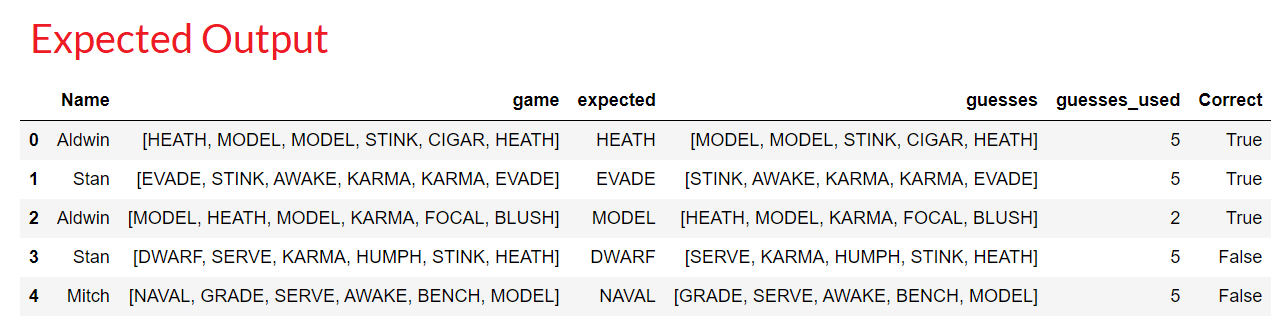

In [6]:
# code here

wordle_df["guesses_used"] = wordle_df.apply(lambda row: next((i for i, num in enumerate (row["guesses"],1) if num == row["expected"]), 5), axis = 1)

wordle_df["Correct"] = wordle_df.apply(lambda row: row["expected"] in row["guesses"], axis=1)

wordle_df

,Name,game,expected,guesses,guesses_used,Correct
0,Aldwin,"[HEATH, MODEL, MODEL, STINK, CIGAR, HEATH]",HEATH,"[MODEL, MODEL, STINK, CIGAR, HEATH]",5,True
1,Stan,"[EVADE, STINK, AWAKE, KARMA, KARMA, EVADE]",EVADE,"[STINK, AWAKE, KARMA, KARMA, EVADE]",5,True
2,Aldwin,"[MODEL, HEATH, MODEL, KARMA, FOCAL, BLUSH]",MODEL,"[HEATH, MODEL, KARMA, FOCAL, BLUSH]",2,True
3,Stan,"[DWARF, SERVE, KARMA, HUMPH, STINK, HEATH]",DWARF,"[SERVE, KARMA, HUMPH, STINK, HEATH]",5,False
4,Mitch,"[NAVAL, GRADE, SERVE, AWAKE, BENCH, MODEL]",NAVAL,"[GRADE, SERVE, AWAKE, BENCH, MODEL]",5,False
...,...,...,...,...,...,...
49995,Aldwin,"[SERVE, NAVAL, BLUSH, HEATH, QUIET, SERVE]",SERVE,"[NAVAL, BLUSH, HEATH, QUIET, SERVE]",5,True
49996,Mitch,"[GRADE, BENCH, CIGAR, NAVAL, HEATH, REBUT]",GRADE,"[BENCH, CIGAR, NAVAL, HEATH, REBUT]",5,False
49997,Aldwin,"[NAVAL, AWAKE, KARMA, BENCH, DWARF, REBUT]",NAVAL,"[AWAKE, KARMA, BENCH, DWARF, REBUT]",5,False
49998,Hazel,"[NAVAL, SERVE, BENCH, BENCH, HUMPH, SERVE]",NAVAL,"[SERVE, BENCH, BENCH, HUMPH, SERVE]",5,False


# Basic EDA

#### 5a. How many players are there? Who are they?

In [7]:
# code here

player_names = wordle_df['Name'].unique()
num_player_names = wordle_df['Name'].nunique()
print(f"The player names are {player_names}, there are {num_player_names} of them.")

The player names are ['Aldwin' 'Stan' 'Mitch' 'Hazel' 'Jer'], there are 5 of them.


#### 5b. Calculate: What are the win rates of every player (# of Wins / # of games played). Who has the highest win rate?


In [13]:
# code here

total_games_user = wordle_df.groupby('Name')['expected'].count()
wins_user = wordle_df.groupby('Name')['Correct'].sum()
wins_user / total_games_user

Name
Aldwin    0.288475
Hazel     0.319733
Jer       0.430489
Mitch     0.393263
Stan      0.383225
dtype: float64

#### 5c. Calculate: On average, what turn did each person win on?   

In [ ]:
# code here

average_win_turn =

#### 5d. What answer (the expected column) showed up the most frequently? 

In [ ]:
# code here

column_expected_answer

----

#### Bonus: Generate this Pivot Table and Explain what it contains


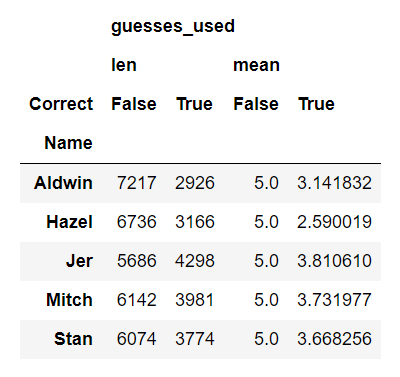

In [9]:
# code here


pivot_table =


SyntaxError: invalid syntax (3261717100.py, line 4)

# END